In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import pandas as pd
from pvlib.location import Location
from sympy import *
from sympy.abc import x,y,z,u,v,w,t
from dtumathtools import *
init_printing()

> Find through literature search the recommended angle at which solar panels are installed in Denmark. The angle is said to be zero degrees if the panel lies flat on the ground (or roof).

The best angle in Copenhagen is $36^\circ$ when the solar panel is facing south.

Source: (Mark Z. Jacobson - World estimates of PV optimal tilt angles and ratios of sunlight incident upon tilted and tracked PV panels relative to horizontal panels) 
https://www.sciencedirect.com/science/article/pii/S0038092X1830375X

> Select a type of solar panel. You can search for installers in Denmark and investigate which panels they typically use, or you can google "solar panel datasheet" or similar. The solar panel should be a standard panel (flat and not curved, for example). Find a datasheet for the chosen solar panel, and describe the panel's size (using $L$ for length and $B$ for width) and indicate Wp/Pmax (referred to as max power, peak power watts, or similar) under the STC standard. Describe what the STC standard entails. Calculate $Wp/(L B)$ (according to the list of standard assumptions above). Assume ideal conditions: the sun is perpendicular to the solar panel, and the solar irradiance is $1100 W/m^2$ for an entire hour. How many joules and kilowatt-hours does the panel deliver in this hour? How many watt-hours is this per $m^2$?


We couldn't find the most used one. Here an arbitrairy panel sold in Denmark: 

Leapton Solar LP182*182-M-60-MH
* Size: L=1909mm B=1134mm 
* Pmax=465W at STC
* STC=standard test conditions: irradiance of 1000W/m^2, atmospheric density of 1.5, cell temperature of $25^\circ$ C, sun angle perpendicular to the solar panel, 500 feets above sea level
* $Wp/(LB)=214.8* W/m^2$

https://cdn-main.ideal.shop/files/ceda878f2258ee9f1ae665939efa17968a02914d3e06ca221038646aa2b869f1c981b7b63936e671c84504d1fcf15b2abbdc826a7001115df085511d7c296d77/Dansolar+datasheet+UK+Leapton460.pdf

> Your final report should also include an introductory section where you describe solar energy and solar cells. You determine what exactly the section should contain, but the sources below can be used to find information. It is recommended to write this section first once you have progressed further with the project. 

1. https://www.pveducation.org/
1. https://www.acs.org/education/resources/highschool/chemmatters/past-issues/archive-2013-2014/how-a-solar-cell-works.html

> Provide a formula or expression for the flux through the surface expressed in terms of $A_0$, $\pmb{u}_p, \pmb{V}, L$, and $B$. We define the flux to be zero if the angle between $\pmb{u}_p$ and $\pmb{V}$ is greater than $\pi/2$ (90 degrees), as we do not want negative flux. Your expression should account for this.

*Hint*: Since the normal vector is constant, you can get rid of the integral sign.


$ReLu(<u_p,V> \cdot A_0 \cdot L \cdot B \cdot)$

> Provide SI units for $\pmb{V}$, $L$, $B$, $A_0$, flux, and energy. Specify the relationship between $\mathrm{J}$ and $\mathrm{kWh}$.

> Write Python code that finds all function values in `f` in the interval $[-0.05, 0.05]$ and indicates the corresponding `t` values. 

In [3]:
indices = np.where((f >= -0.05) & (f <= 0.05))
for t_val, f_val in zip(t[indices], f[indices]):
    print(t_val, f_val)

NameError: name 'f' is not defined

> Write a Python function that can find both sign changes (zero crossings) of `f`.


In [ ]:
def find_zero_crossings(f):
    return np.where(np.diff(np.sign(f)))[0]

In [ ]:
t[find_zero_crossings(f)]

NameError: name 'f' is not defined

> Write a Python function `def solar_elevation_angle(theta)` that, given $\theta$ in degrees, calculates $\alpha$ in degrees.

In [15]:
def solar_elevation_angle(theta):
    alpha = 90 - theta
    return alpha

> Suppose the sun has a fixed distance $r_s$ to the Earth. Find a reasonable value for $r_s$. Provide a (mathematical) expression for how the sun's $xyz$-coordinates can be calculated from $r_s$, $\theta_s$, and $\phi_s$, where $\theta_s$ and $\phi_s$ are respectively the zenith and azimuth angles for the sun's position.

$r_s$ is approximately 150 million kilometers $(1.5 · 10^11 m)$ from the Earth. 

*Note: added m in case they're needed for calculations; if not, erase.*

It is given that $\alpha + \theta = 90$, so, from the Earth's perspective we'll preferably work with $\alpha$ as it considers the Sun's position from the horizon, up. Hence

$\left[ 
\begin{array}{c}
x\\
y\\
z 
\end{array}
\right]$ 
$=$
$\left[
\begin{array}{c}
r_s cos(\alpha_s)\\
r_s sin(\alpha_s)\\
r_s tan(\phi_s)
\end{array}
\right]$

The above is a non-normalized vector expression for $u_s$. If that is followed, the expression will become the parametrization of a sphere in terms of $\alpha$. 

Alternatively, it may start off of the normalized parametrization of a sphere, using $\theta$ instead and losing the unitary quality of its origin with the addition of the scalar $r_s$.

$\left[ 
\begin{array}{c}
x\\
y\\
z 
\end{array}
\right]$ 
$=$
$\left[
\begin{array}{c}
r_s sin(\theta_s) cos(\phi_s)\\
r_s sin(\theta_s) sin(\phi_s)\\
r_s  cos(\phi_s)
\end{array}
\right]$



> Provide a (mathematical) expression for $\pmb{u}_p$ and for $\langle \pmb{u}_{s}, \pmb{u}_p \rangle$ based on the zenith and azimuth angles. You should simplify the expression so that it contains $\cos(\theta_p-\theta_s)$ and only 5 trigonometric functions. Show that $-1 \le \langle \pmb{u}_{s}, \pmb{u}_p \rangle \le 1$. Explain in your own words what it means when $\langle \pmb{u}_{s}, \pmb{u}_p \rangle < 0$.


$<u_s, u_p> = \sin(\alpha_p)\sin(\alpha_s) + \cos(\alpha)\cos(\alpha_s)\cos(\phi_p - \phi_s)\\
<u_s, u_p> = \frac{cos(\alpha_p - \alpha_s) - cos(\alpha_p+\alpha_s)}{2} + \cos(\alpha)\cos(\alpha_s)\cos(\phi_p - \phi_s)$

*Note:* our vectors result from the parametrization of a sphere in terms of alpha instead of theta, knowing that alpha + theta = 90. For more info on this, Emilia has the working out of it.

$sin(a)sin(b) = (1/2)(cos(a-b)-cos(a+b))$

> Write a Python function `def solar_panel_projection(theta_sun, phi_sun, theta_panel, phi_panel)` that returns $\langle \pmb{n}_{s}, \pmb{n}_p \rangle$ when it is positive and otherwise returns zero.

In [14]:
phi_panel, alpha_panel, phi_sun, alpha_sun = symbols("phi_panel alpha_panel phi_sun alpha_sun")

def solar_panel_projection(alpha_sun, phi_sun, alpha_panel, phi_panel):
    u_p = cos(alpha_panel) * Matrix([[cos(phi_panel)], [sin(phi_panel)], [tan(alpha_panel)]])
    u_s = cos(alpha_sun) * Matrix([[cos(phi_sun)], [sin(phi_sun)], [tan(alpha_sun)]])
    u_s__u_p = u_s.dot(u_p).simplify()
    if u_s__u_p < 0:
        return 0
    else:
        return u_s__u_p

> Take another look at your Python function `def solar_panel_projection(theta_sun, phi_sun, theta_panel, phi_panel)`. Rewrite it so that it works on NumPy arrays of zenith and azimuth angles. You can test it on the following three situations, where the projection should yield $0.707107$, $0.0$, and $0.0$ (or rather, with numerical errors, it should give `array([7.07106781e-01, 6.12323400e-17, 0.0])`). Explain the orientation of the solar panel and the position of the sun in the three situations.



In [16]:
def solar_panel_projection(theta_sun, phi_sun, theta_panel, phi_panel): #(zenith, azimuth)
    alpha_sun = np.pi/2 - theta_sun
    alpha_panel = np.pi/2 - theta_panel
    u_p = np.cos(alpha_panel) * np.array([[np.cos(phi_panel)], [np.sin(phi_panel)], [np.tan(alpha_panel)]])
    u_s = np.cos(alpha_sun) *np.array([[np.cos(phi_sun)], [np.sin(phi_sun)], [np.tan(alpha_sun)]])
    u_s__u_p = np.dot(u_p.flatten(), u_s.flatten())
    if u_s__u_p <0:
        return 0
    else:
        return u_s__u_p

In [17]:
#Testing cell for above function

theta_sun = np.array([np.pi / 4]) #, np.pi / 2, 0.0])
phi_sun = np.array([np.pi]) #, np.pi / 2, 0.0])
theta_panel = np.array([0.0]) #, np.pi / 2, np.pi])
phi_panel = np.array([np.pi]) #, 0.0, 0.0])

theta_sun2 = np.array([np.pi / 2]) # 0.0])
phi_sun2 = np.array([np.pi]) # 0.0])
theta_panel2 = np.array([np.pi / 2]) #np.pi])
phi_panel2 = np.array([0.0]) #0

theta_sun3 = np.array([0.0]) # 0.0])
phi_sun3 = np.array([0.0]) # 0.0])
theta_panel3 = np.array([np.pi]) #np.pi])
phi_panel3 = np.array([0.0]) #0

angles1 = solar_panel_projection(theta_sun, phi_sun, theta_panel, phi_panel)
angles2 = solar_panel_projection(theta_sun2, phi_sun2, theta_panel2, phi_panel2)
angles3 = solar_panel_projection(theta_sun3, phi_sun3, theta_panel3, phi_panel3)

[angles1, angles2, angles3]

> Choose a location for your solar panel, for example, DTU. Update the above GPS coordinates (measured in DecimalDegrees), altitude, and name to match the chosen location.

55.785469, 12.519103

In [18]:
timezone = "Europe/Copenhagen"
start_date = "2024-04-20"
end_date = "2024-04-20"
delta_time = "H"  # "Min", "H", 

# Definition of Location object. Coordinates and elevation of Amager, Copenhagen (Denmark)
site = Location(
    55.785469, 12.519103, timezone, 10, "DTU (DK)"
)  # latitude, longitude, time_zone, altitude, name

# Definition of a time range of simulation
times = pd.date_range(
    start_date + " 00:00:00", end_date + " 23:59:00", freq=delta_time, tz=timezone
)
#print(times)

sunpos = site.get_solarposition(times)


In [19]:
def solar_flux(i):
    #Defining angles in radians
    alpha = np.deg2rad(sunpos.apparent_elevation)
    azimuth = np.deg2rad(sunpos.azimuth)
    vector = (Matrix([cos(azimuth[i]),sin(azimuth[i]),tan(alpha[i])]))
    return(vector.normalized()*1100)

In [20]:
def panel_normal(azimuth,alpha):
    vector = np.array([np.cos(azimuth), np.sin(azimuth), np.tan(alpha)])
    return(vector / np.linalg.norm(vector))

In [21]:
def panel_normal_np(azimuth,alpha):
    azimuth = np.deg2rad(azimuth)
    alpha = np.deg2rad(alpha)
    vector = np.array([np.cos(azimuth), np.sin(azimuth), np.tan(alpha)])
    return(vector / np.linalg.norm(vector))

Here we have chosen to plot the solar angles for April 1st.

> Plot the zenith, azimuth, and elevation angles of the sun, i.e., $\theta_s, \phi_s, \alpha_s$, for the entire day of April 20, 2024, as a function of time.


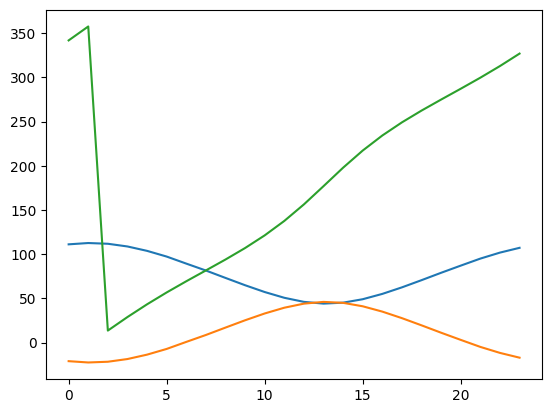

In [22]:
thet = sunpos.apparent_zenith
azim = sunpos.azimuth
alph = sunpos.apparent_elevation
time = []
for i in range(24):
    time.append(i)
plt.plot(time,thet)
plt.plot(time,alph)
plt.plot(time,azim)

> Plot the elevation angle of the sun and determine when the sun is highest during the day on April 20, 2024. Explain what it means when $\alpha_s < 0$ or $\theta_s > 90^\circ$.

In [23]:
for i in range(len(alph)):
    if alph[i] == max(alph):
        indexi = i
        break
indexi

/var/folders/jg/9d1b7xms15j6vkjkxgtdfqm80000gp/T/ipykernel_68621/156121367.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if alph[i] == max(alph):


> Find the time of sunrise and sunset at DTU on April 20, 2024. Compare with "known" values such as those from DMI. *Hint:* If you want precise values, you should use `apparent_elevation` (apparent sun elevation accounting for atmospheric refraction) instead of `elevation`. You do not need to account for the curvature of the Earth.


In [24]:
for i in range(len(alph)):
    if alph[i] < 0 and alph[i+1] >= 0:
        sunri = i +1
    if alph[i] >0 and alph[i+1] <=0:
        sunse = i+1
        break
display(sunri,sunse)

/var/folders/jg/9d1b7xms15j6vkjkxgtdfqm80000gp/T/ipykernel_68621/936295048.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if alph[i] < 0 and alph[i+1] >= 0:
/var/folders/jg/9d1b7xms15j6vkjkxgtdfqm80000gp/T/ipykernel_68621/936295048.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if alph[i] >0 and alph[i+1] <=0:


> Find the highest point of the sun in the sky (in degrees) on the summer solstice at DTU, and when during the day it occurs? *Hint:* You will need to change the start and end dates for the `sunpos` object.

In [25]:
timezone = "Europe/Copenhagen"
start_date = "2024-04-20"
end_date = "2024-09-20"
delta_time = "Min"  # "Min", "H", 

# Definition of Location object. Coordinates and elevation of Amager, Copenhagen (Denmark)
site = Location(
    55.785469, 12.519103, timezone, 21, "DTU (DK)"
)  # latitude, longitude, time_zone, altitude, name

# Definition of a time range of simulation
times = pd.date_range(
    start_date + " 00:00:00", end_date + " 23:59:00", freq=delta_time, tz=timezone
)
#print(times)

sunpos = site.get_solarposition(times)
maximum=sunpos.apparent_elevation.max()
for i in range(len(sunpos.apparent_elevation)):
    if sunpos.apparent_elevation[i] == maximum:
        display(i%24)
        display(maximum)
        break

/var/folders/jg/9d1b7xms15j6vkjkxgtdfqm80000gp/T/ipykernel_68621/3780263234.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if sunpos.apparent_elevation[i] == maximum:


> Create a Python function that can calculate the highest point of the sun $\alpha_{max}$ in the sky (in degrees) on a given date (year-month-day) at a given location (e.g., city) specified by latitude and longitude. *Hint:* The answer should not depend on longitude, as the highest point of the sun in the sky depends only on latitude.

In [26]:
def highest_point_calc(date, latitude):

    delta_time = "Min"  # "Min", "H", 

    # Definition of Location object.
    site = Location(
        latitude, 0
    )  # latitude, longitude

    # Definition of a time range of simulation
    times = pd.date_range(
        date + " 00:00:00", date + " 23:59:00", freq=delta_time
    )

    sunpos = site.get_solarposition(times)
    maximum=sunpos.apparent_elevation.max()
    return maximum

highest_point_calc("2024-12-21", 90)

In a previous task, you found an expression for the sun's $xyz$ coordinates from $r_s$, $\theta_s$, and $\phi_s$.

> Write a Python function (for use with NumPy arrays) that converts from the sun's zenith and azimuth to the sun's position given in $xyz$ coordinates. Remember whether you are working in radians or degrees. The `np.deg2rad()` function may be useful. It's fine to use an approximate value for $r_{s}$, but you can find a more accurate value with: `pvlib.solarposition.nrel_earthsun_distance(times) * 149597870700`, where `149597870700` is the number of meters in an astronomical unit (AU).

/var/folders/jg/9d1b7xms15j6vkjkxgtdfqm80000gp/T/ipykernel_68621/3161461169.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vector = (Matrix([cos(azimuth[i]),sin(azimuth[i]),tan(alpha[i])]))


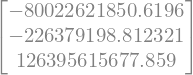

In [27]:
def sunloc(azimuth,alpha,r):
    #Defining angles in radians
    alpha = np.deg2rad(sunpos.apparent_elevation)
    azimuth = np.deg2rad(sunpos.azimuth)
    vector = (Matrix([cos(azimuth[i]),sin(azimuth[i]),tan(alpha[i])]))
    return(vector.normalized()*r)
sunloc(180,57,149597870700)

> Write a Python function that converts from the sun's position in the sky to zenith and azimuth (in degrees or radians) in $xyz$ coordinates. The `np.arctan2(y, x)` and `np.rad2deg()` functions may be useful.

> Create a Python function that can calculate the flux of the sun's vector field through the solar panel's surface for each minute throughout the day. You should use `solar_panel_projection(theta_sun, phi_sun, theta_panel, phi_panel)`. Remember to only include solar zenith angles $\theta_s \in [0, \pi/2]$ (why?) so that the panel's flux is zero if the $\theta_s$ values (in a vector like `sunpos.loc[chosen_date].zenith`) are above $\pi/2$, i.e., 90 degrees.

In [28]:
#   *****    New and optimised code    ******

def flux_function(azimuth_panel, alpha_panel, A0, L, B, sunpos):
    energy = 0
    
    # Creates the normal vector of the panel with the provided angles
    panel = panel_normal_np(azimuth_panel, alpha_panel)

    sunpos = sunpos[sunpos['apparent_elevation'] > 0]

    alpha = np.deg2rad(sunpos.apparent_elevation)
    azimuth = np.deg2rad(sunpos.azimuth)

    cos_azimuth = np.cos(azimuth)
    sin_azitmuth = np.sin(azimuth)
    tan_alpha = np.tan(alpha)

    solar_flux_array = np.array([cos_azimuth, sin_azitmuth, tan_alpha])
    #print(solar_flux_array)
    for i in range(len(alpha)):
        solar_flux = solar_flux_array[:, i]*1100 / np.linalg.norm(solar_flux_array[:, i])
        #print(np.dot(panel, solar_flux), solar_flux, panel)
        energy += max(0, np.dot(panel, solar_flux))*A0*L*B/1000
            
    return energy


timezone = "Europe/Copenhagen"
start_date = "2024-01-01"
end_date = "2024-12-31"
delta_time = "H"  # "Min", "H",

# Definition of Location object. Coordinates and elevation of Amager, Copenhagen (Denmark)
site = Location(
    55.785469, 12.519103, timezone, 21, "DTU (DK)"
)  # latitude, longitude, time_zone, altitude, name

# Definition of a time range of simulation
times = pd.date_range(
    start_date + " 00:00:00", end_date + " 23:59:00", freq=delta_time, tz=timezone
)

sunpos = site.get_solarposition(times)
result = flux_function(180, 45, 0.5, 1, 1, sunpos)
display(result)
#plt.plot(result[1])
#print(len(result[1]))

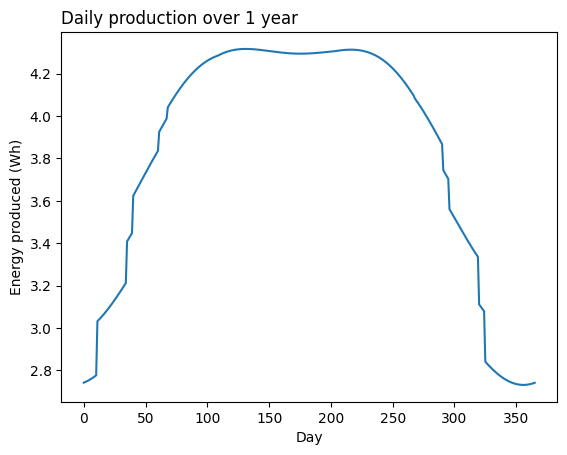

In [29]:
#   *****    Returns the daily production as a list and the total energy produced    ******

def flux_function_daily_prod(azimuth_panel, alpha_panel, A0, L, B, sunpos):
    energy = 0
    daily_energy = 0
    hours_counter = 0
    daily_energy_prod = []

    # Creates the normal vector of the panel with the provided angles
    panel = panel_normal_np(azimuth_panel, alpha_panel)

    # sunpos = sunpos[sunpos['apparent_elevation'] > 0]

    alpha = np.deg2rad(sunpos.apparent_elevation)
    azimuth = np.deg2rad(sunpos.azimuth)

    cos_azimuth = np.cos(azimuth)
    sin_azitmuth = np.sin(azimuth)
    tan_alpha = np.tan(alpha)

    solar_flux_array = np.array([cos_azimuth, sin_azitmuth, tan_alpha])

    for i in range(len(alpha)):
        if hours_counter == 24:
            hours_counter = 0
            daily_energy_prod.append(daily_energy)
            energy += daily_energy
            daily_energy = 0

        if alpha.iloc[i] > 0:
            solar_flux = solar_flux_array[:, i]*1100 / np.linalg.norm(solar_flux_array[:, i])
            daily_energy += max(0, np.dot(panel, solar_flux))*A0*L*B/1000
        
        hours_counter += 1
        
    daily_energy_prod.append(daily_energy)
    energy += daily_energy
            
    return energy, daily_energy_prod


timezone = "Europe/Copenhagen"
start_date = "2024-01-01"
end_date = "2024-12-31"
delta_time = "H"  # "Min", "H",

# Definition of Location object. Coordinates and elevation of Amager, Copenhagen (Denmark)
site = Location(
    55.785469, 12.519103, timezone, 21, "DTU (DK)"
)  # latitude, longitude, time_zone, altitude, name

# Definition of a time range of simulation
times = pd.date_range(
    start_date + " 00:00:00", end_date + " 23:59:00", freq=delta_time, tz=timezone
)

sunpos = site.get_solarposition(times)
result = flux_function_daily_prod(180, 45, 0.5, 1, 1, sunpos)
display(result[0])

plt.title("Daily production over 1 year", loc = 'left')
plt.xlabel("Day")
plt.ylabel("Energy produced (Wh)")

plt.plot(result[1])
plt.show()

> Point the solar panel towards the south, i.e., azimuth angle $\phi_p = 180^\circ$. Calculate the energy production for April 20th for each *integer* angle $\theta_p$ between 0 and 90 degrees.


Optimal angle: 39°
Enegry production at this angle: 1409.97968897001 kWh


Text(0, 0.5, 'panels incident energy')

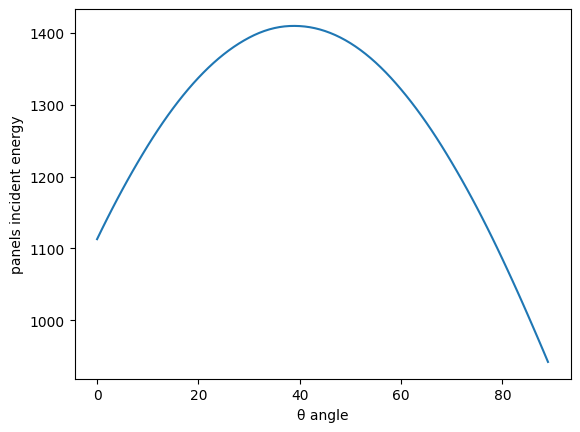

In [35]:
angle = []
energy = []
for alpha in range(0,90):
    angle.append(alpha)
    energy.append(flux_function(180, alpha, 0.5, 1, 1, sunpos))
max_pos = np.argmax(energy)

print(f"Optimal angle: {angle[max_pos]}°")
print(f"Enegry production at this angle: {energy[max_pos]} kWh")
plt.plot(angle, energy)
plt.xlabel("θ angle")
plt.ylabel("panels incident energy")

> Point the solar panel towards the south, i.e., azimuth angle $\phi_p = 180^\circ$. Calculate the energy production for the entire year 2024 for each *integer* angle $\theta_p$ between 0 and 90 degrees.

> Find the optimal angle $\theta_p$ and indicate the energy production. How much less is the energy production if $\phi_p$ is, for example, $175^\circ$ or similar?

The optimal angle is $\alpha$ = 39º, yielding approximately 1409.98 kWh in a year when the azimuthal angle is at 180º.

If $\phi = 175º$, the change corresponds to about 2 kWh at 1407.64 kWh in a year.


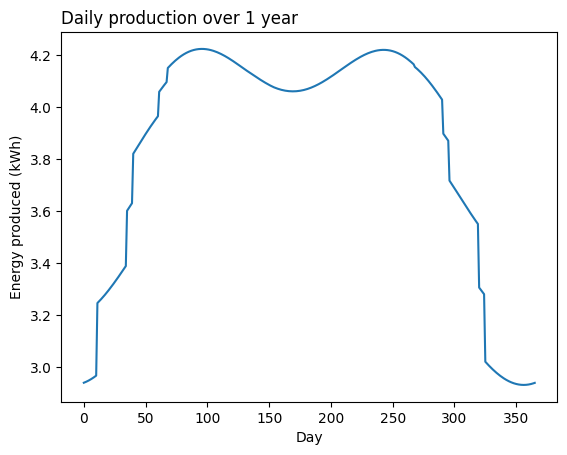

In [ ]:
sunpos = site.get_solarposition(times)
result = flux_function_daily_prod(180, 39, 0.5, 1, 1, sunpos)
display(result[0])

plt.title("Daily production over 1 year", loc = 'left')
plt.xlabel("Day")
plt.ylabel("Energy produced (kWh)")

plt.plot(result[1])
plt.show()

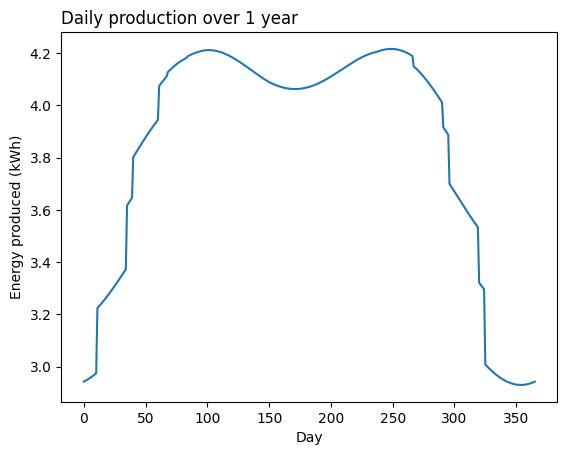

In [ ]:
sunpos = site.get_solarposition(times)
result = flux_function_daily_prod(175, 39, 0.5, 1, 1, sunpos)
display(result[0])

plt.title("Daily production over 1 year", loc = 'left')
plt.xlabel("Day")
plt.ylabel("Energy produced (kWh)")

plt.plot(result[1])
plt.show()

> Set up a realistic configuration of $X$ number of solar panels, where you choose $X$ according to a typical setup on a single-family house. Solar panels are set up at the optimal angle. Calculate the energy production for each day and plot this as a function of time (specified in days).

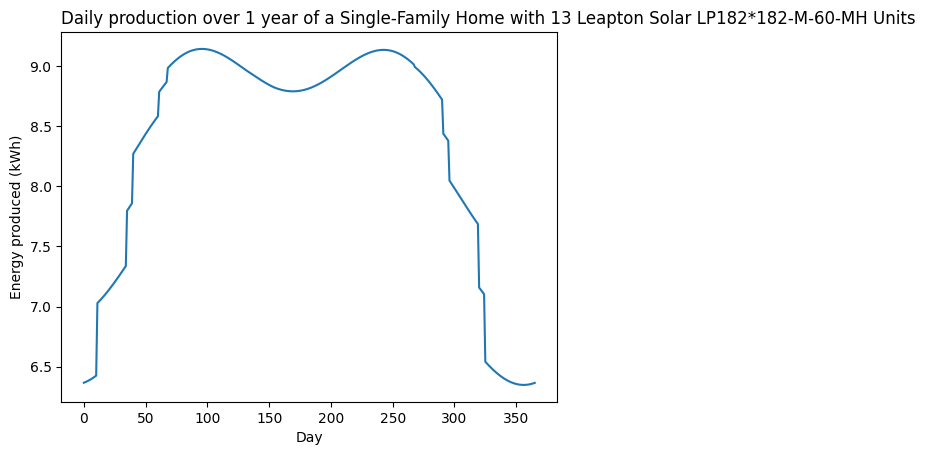

In [ ]:
sunpos = site.get_solarposition(times)
result = flux_function_daily_prod(180, 39, 0.5, 1.134, 1.909, sunpos)
display((13*result[0]))

plt.title("Daily production over 1 year of a Single-Family Home with 13 Leapton Solar LP182*182-M-60-MH Units", loc = 'left')
plt.xlabel("Day")
plt.ylabel("Energy produced (kWh)")

plt.plot(result[1])
plt.show()

For a 140 $m^2$ single-family house with a medium-high annual consumption of 6000-8000 kWh the solar panel arrangement would include 10-15 panels. We'll consider an average of 13 panels (X = 13).

Panel considered => Leapton Solar LP182*182-M-60-MH with a $W_p/m^2$ of 214.8 $W/m2$ under STC; dimensions: B = 1134mm and L = 1909mm

The installation would theoretically yield 39680.32 kWh in a year, however, an average efficiency of 18% reduces it down to about 7142 kWh.